<a href="https://colab.research.google.com/github/jc77-7/Recommender-System---2/blob/main/METHODOLOGY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

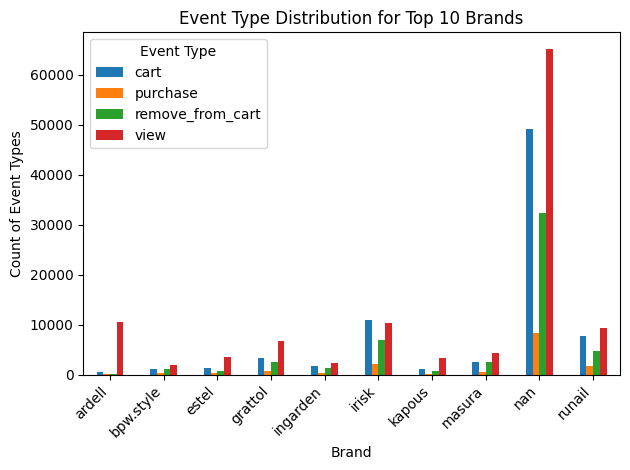

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/2020-Feb.csv')

# Convert 'brand' column to string type
data['brand'] = data['brand'].astype(str)

# Get top 10 brands overall
top_brands = data['brand'].value_counts().nlargest(10).index

# Filter data for top brands
filtered_data = data[data['brand'].isin(top_brands)]

# Group data by brand and count occurrences of each event type
brand_event_counts = filtered_data.groupby('brand')['event_type'].value_counts().unstack(fill_value=0)

# Plot the data as a bar chart
brand_event_counts.plot(kind='bar')  # Use 'bar' instead of 'line'
plt.title('Event Type Distribution for Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Count of Event Types')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505172 sha256=3378224d392c1bcb979264b62239f68e4e4d6a28b53c88990e3c31782c897f62
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
import pandas as pd

# Load your data from the CSV file using pandas
df = pd.read_csv('/content/2020-Feb.csv')

# ---->  Convert 'event_type' to numerical representation <----
# Create a mapping of event types to numerical values
event_type_mapping = {
    'view': 1,
    'cart': 2,
    'purchase': 3,  # Example mapping, adjust as needed
    # ... Add other event types and their mappings
}

# Apply the mapping to the 'event_type' column
df['event_type_num'] = df['event_type'].map(event_type_mapping)

# Print the actual column names in your DataFrame
print(df.columns)

# Assuming your CSV has columns like 'user_id', 'product_id', and 'rating_value'
# Replace these with your actual column names
# Define a Reader object to specify the rating scale
reader = Reader(rating_scale=(1, 5))

# ----> Use 'event_type_num' instead of 'event_type'<----
# Load the data into a Surprise Dataset object
# Use the actual column names from your DataFrame
data = Dataset.load_from_df(df[['user_id', 'product_id', 'event_type_num']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Instantiate the SVD model
svd = SVD()

# Train the model on the training set
svd.fit(trainset)

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session',
       'event_type_num'],
      dtype='object')


In [ ]:
# Predict the !pip install imbalanced-learn

from imblearn.over_sampling import RandomOverSampler
rating for a specific user and item
user_id = str(485174092)  # Replace with a user ID from your dataset
product_id = str(5844305)  # Replace with a product ID from your dataset
predicted_rating = svd.predict(user_id, product_id).est

# ----> Interpret the predicted rating <----
# Map the predicted rating back to the event type
event_type_mapping_reverse = {v: k for k, v in event_type_mapping.items()}
predicted_event_type = event_type_mapping_reverse.get(round(predicted_rating))


# Handle cases where predicted_event_type is None
if predicted_event_type is None:
    # Check if the predicted rating is outside the mapping range
    if predicted_rating < min(event_type_mapping.values()):
        predicted_event_type = list(event_type_mapping.keys())[0]  # Assign to the first event type
    elif predicted_rating > max(event_type_mapping.values()):
        predicted_event_type = list(event_type_mapping.keys())[-1]  # Assign to the last event type
    else:
        # If within range but still None, you might have missing values in mapping
        predicted_event_type = "Unknown"  # Or handle in another appropriate way


print(f"Predicted event type for user {user_id} on item {product_id}: {predicted_event_type}")

Predicted event type for user 485174092 on item 5844305: purchase


In [ ]:
!pip install scikit-surprise
!pip install imbalanced-learn

import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
from imblearn.over_sampling import RandomOverSampler


# Load your data from the CSV file using pandas
df = pd.read_csv('/content/2020-Feb.csv')

# ---->  Convert 'event_type' to numerical representation <----
# Create a mapping of event types to numerical values
# Handle unknown event types by assigning a default value (e.g., 0)
event_type_mapping = {
    'view': 1,
    'cart': 2,
    'purchase': 3,  # Example mapping, adjust as needed
    # ... Add other event types and their mappings
}

# Apply the mapping to the 'event_type' column, handling unknown values
df['event_type_num'] = df['event_type'].map(event_type_mapping).fillna(0)
#fillna(0) will replace any NaN values created due to missing keys in your mapping with 0.


# ----> Address class imbalance using oversampling <----
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['user_id', 'product_id']], df['event_type_num'])

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=['user_id', 'product_id'])
df_resampled['event_type_num'] = y_resampled


# Define a Reader object to specify the rating scale
reader = Reader(rating_scale=(1, 5))

# ----> Use 'event_type_num' instead of 'event_type'<----
# Load the data into a Surprise Dataset object
# Use the actual column names from your DataFrame
data = Dataset.load_from_df(df_resampled[['user_id', 'product_id', 'event_type_num']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Instantiate the SVD model
svd = SVD()

# Train the model on the training set
svd.fit(trainset)

# Predict ratings for the test set
predictions = svd.test(testset)

# Compute and print RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# ----> Predict and interpret the event type for a specific user and item <---
user_id = str(47)  # Replace with a user ID from your dataset
product_id = str(5813498)  # Replace with a product ID from your dataset
predicted_rating = svd.predict(user_id, product_id).est

# Map the predicted rating back to the event type
event_type_mapping_reverse = {v: k for k, v in event_type_mapping.items()}
predicted_event_type = event_type_mapping_reverse.get(round(predicted_rating))

# Handle cases where predicted_event_type is None
if predicted_event_type is None:
    if predicted_rating < min(event_type_mapping.values()):
        predicted_event_type = list(event_type_mapping.keys())[0]
    elif predicted_rating > max(event_type_mapping.values()):
        predicted_event_type = list(event_type_mapping.keys())[-1]
    else:
        predicted_event_type = "Unknown"

print(f"Predicted event type for user {user_id} on item {product_id}: {predicted_event_type}")

RMSE: 0.7791
MAE:  0.6352
Predicted event type for user 47 on item 5813498: cart


In [ ]:
import numpy as np
import pandas as pd
file = pd.read_csv("/content/2020-Jan.csv")
print(file)

                    event_time        event_type  product_id   category_id  \
0      2020-01-01 00:00:00 UTC              view   5809910.0  1.602944e+18   
1      2020-01-01 00:00:09 UTC              view   5812943.0  1.487580e+18   
2      2020-01-01 00:00:19 UTC              view   5798924.0  1.783999e+18   
3      2020-01-01 00:00:24 UTC              view   5793052.0  1.487580e+18   
4      2020-01-01 00:00:25 UTC              view   5899926.0  2.115334e+18   
...                        ...               ...         ...           ...   
71424  2020-01-01 21:14:27 UTC              view   5751422.0  1.487580e+18   
71425  2020-01-01 21:14:28 UTC  remove_from_cart   5830523.0  1.487580e+18   
71426  2020-01-01 21:14:28 UTC  remove_from_cart   5830523.0  1.487580e+18   
71427  2020-01-01 21:14:30 UTC              view   5803082.0  1.487580e+18   
71428  2020-01-01 21:14:31 UTC               NaN         NaN           NaN   

      category_code     brand  price      user_id  \
0         

In [ ]:
print(file.columns)

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')


In [ ]:
col = file[['brand', 'user_id', 'product_id', 'price']]
print(col.head(10))

      brand      user_id  product_id   price
0   grattol  595414620.0   5809910.0    5.24
1  kinetics  595414640.0   5812943.0    3.97
2    zinger  595412617.0   5798924.0    3.97
3       NaN  420652863.0   5793052.0    4.92
4       NaN  484071203.0   5899926.0    3.92
5   staleks  595412617.0   5837111.0    6.35
6  marathon  593016733.0   5850281.0  137.78
7       NaN  595411904.0   5802440.0    2.16
8       NaN  420652863.0   5726464.0    5.56
9  marathon  593016733.0   5850281.0  137.78


In [ ]:
null_counts = col.isnull().sum()
print(null_counts)

brand         32225
user_id           1
product_id        1
price             1
dtype: int64


In [ ]:
# Drop rows with missing values in 'brand', 'user_id', or 'price'
clean_data = col.dropna(subset=['brand', 'user_id', 'price'])

# Check if the missing values are gone
print(clean_data.isnull().sum())

duplicates = col.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Show the duplicated rows (if any)
print(col[duplicates])


brand         0
user_id       0
product_id    0
price         0
dtype: int64
Number of duplicate rows: 26523
          brand      user_id  product_id   price
9      marathon  593016733.0   5850281.0  137.78
10     marathon  593016733.0   5850281.0  137.78
12          NaN  595411904.0   5802440.0    2.16
23         milv  595414814.0   5810716.0    1.27
33       runail  397780878.0      4938.0    1.43
...         ...          ...         ...     ...
71416       NaN  395169130.0   5758923.0    2.38
71418       NaN  547470608.0   5560970.0    3.00
71421       NaN  595720066.0   5695913.0    1.43
71425    masura  582084805.0   5830523.0    3.95
71426    masura  582084805.0   5830523.0    3.95

[26523 rows x 4 columns]


In [ ]:
# Drop exact duplicate rows, keeping the first occurrence
clean_data = col.drop_duplicates(keep='first')

# Verify if duplicates are removed
print(f"Number of duplicate rows after removal: {clean_data.duplicated().sum()}")


Number of duplicate rows after removal: 0


In [ ]:
import numpy as np
import pandas as pd
file = pd.read_csv("/content/2020-Jan.csv")

col = file[['brand', 'user_id', 'product_id', 'price']]

null_counts = col.isnull().sum()

clean_data = col.dropna(subset=['brand', 'user_id', 'price'])
duplicates = col.duplicated()
clean_data = col.drop_duplicates(keep='first')

# Get the top 1000 most frequent users and products
top_users = col['user_id'].value_counts().head(100).index
top_products = col['product_id'].value_counts().head(100).index

# Filter the dataset to only include top users and products
filtered_data = col[col['user_id'].isin(top_users) & col['product_id'].isin(top_products)]


# Create the User-Item matrix from the filtered data
user_item_matrix = filtered_data.pivot_table(
    index='user_id',
    columns='product_id',
    values='price',
    aggfunc='mean',
    fill_value=0
)
print(user_item_matrix.shape)
print("Example User-Item Matrix (first 5 rows and columns):\n", user_item_matrix.iloc[:10, :10])


(93, 94)
Example User-Item Matrix (first 5 rows and columns):
 product_id  5013     5304     6941     5528034  5528035  5549786  5549838  \
user_id                                                                     
302347185       0.0     0.00      0.0     0.00     0.00      0.0      0.0   
313495620       0.0     0.00      0.0     0.00     0.00      0.0      0.0   
347633566       0.0     0.32      0.0     9.52     9.52      0.0      0.0   
351818112       0.0     0.00      0.0     0.00     0.00      0.0      0.0   
351903905       0.0     0.32      0.0     0.00     0.00      0.0      0.0   
373989853       0.0     0.00      0.0     0.00     0.00      0.0      0.0   
377539088       0.0     0.00      0.0     0.00     0.00      0.0      0.0   
386491215       0.0     0.00      0.0     0.00     0.00      0.0      0.0   
396195716       0.0     0.32      0.0     0.00     0.00      0.0      0.0   
397415839       0.0     0.00      0.0     0.00     0.00      0.0      0.0   

product_id  

Recommended items for user 223293700: ['4497', '4958', '5304']


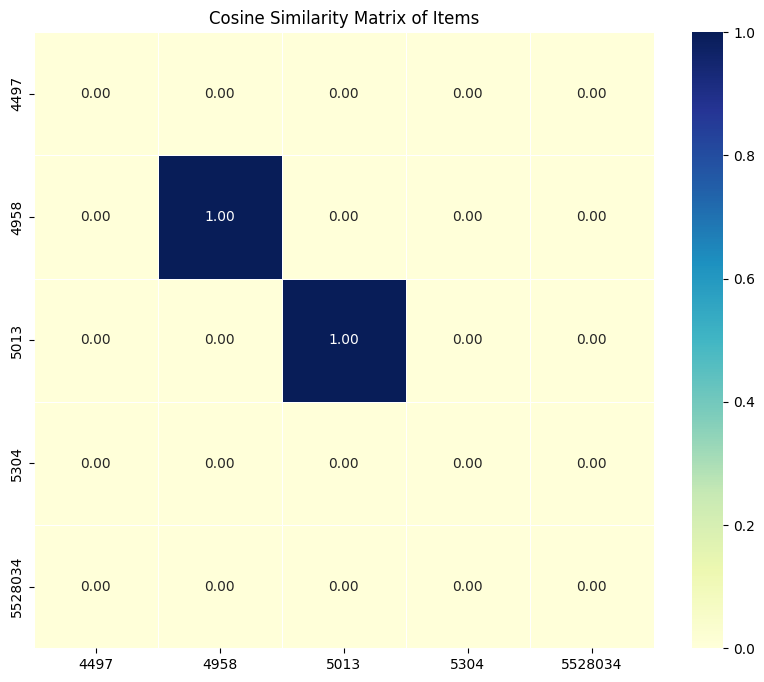

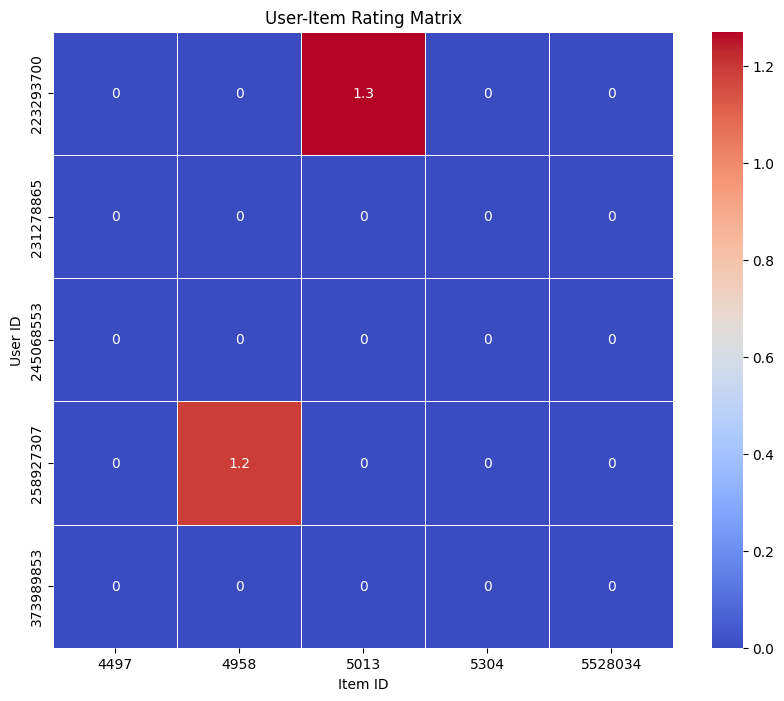

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (example user-item matrix)
# Assuming you have a user-item matrix `df` (user_id, product_id, rating)
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Example user-item matrix (replace this with your actual data)
data = {
    'user_id': [223293700, 231278865, 245068553, 258927307, 373989853],
    '4497': [0.0, 0.0, 0.0, 0.0, 0.0],
    '4958': [0.0, 0.0, 0.0, 1.19, 0.0],
    '5013': [1.27, 0.0, 0.0, 0.0, 0.0],
    '5304': [0.0, 0.0, 0.0, 0.0, 0.0],
    '5528034': [0.0, 0.0, 0.0, 0.0, 0.0]
}

# Create a DataFrame
df = pd.DataFrame(data).set_index('user_id')

# Normalize the matrix (to handle missing values)
df_normalized = df.fillna(0)

# Transpose the matrix to make items the rows (for item-based CF)
df_transposed = df_normalized.T

# Compute cosine similarity between items
cosine_sim = cosine_similarity(df_transposed)

# Convert cosine similarity matrix into DataFrame for easy handling
cosine_sim_df = pd.DataFrame(cosine_sim, index=df.columns, columns=df.columns)

# Function to get top K similar items (k-NN for items)
def get_top_k_similar_items(item_id, k=3):
    # Get similarity scores for the given item (row in the matrix)
    similarity_scores = cosine_sim_df[item_id]

    # Sort items by similarity score in descending order and return the top K
    similar_items = similarity_scores.sort_values(ascending=False)[1:k+1]
    return similar_items

# Function to generate recommendations for a user based on item k-NN
def recommend_items(user_id, k=3):
    user_ratings = df.loc[user_id]

    # Get items that the user has rated (non-zero ratings)
    rated_items = user_ratings[user_ratings > 0].index.tolist()

    # List to store recommended items
    recommended_items = []

    for rated_item in rated_items:
        # Get top K similar items for each item the user has rated
        similar_items = get_top_k_similar_items(rated_item, k)

        # Add similar items to the recommended list
        recommended_items.extend(similar_items.index.tolist())

    # Remove duplicates and return the top K recommendations
    recommended_items = list(set(recommended_items))
    return recommended_items[:k]

# Example: Recommend items for a specific user
user_id = 223293700
k = 3
recommendations = recommend_items(user_id, k)
print(f"Recommended items for user {user_id}: {recommendations}")



plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Cosine Similarity Matrix of Items")
plt.show()


# 2. User-Item Rating Matrix Visualization (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(df_normalized, cmap="coolwarm", annot=True, cbar=True, linewidths=0.5)
plt.title("User-Item Rating Matrix")
plt.xlabel("Item ID")
plt.ylabel("User ID")
plt.show()







In [ ]:
print(df.index)

Index([223293700, 231278865, 245068553, 258927307, 373989853], dtype='int64', name='user_id')


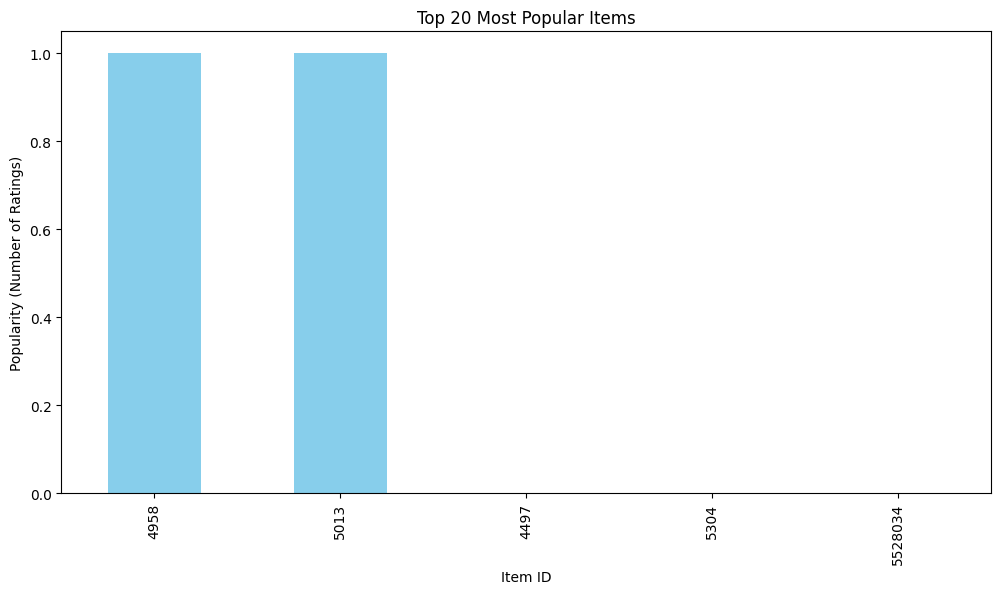

In [ ]:

# Popularity based on the number of ratings each item has received
item_popularity = df_normalized.astype(bool).sum(axis=0)

# Alternatively, you can calculate the average rating for each item
# item_popularity = df_normalized.mean(axis=0)

# Plot item popularity
plt.figure(figsize=(12, 6))
item_popularity.sort_values(ascending=False).head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Popular Items')
plt.xlabel('Item ID')
plt.ylabel('Popularity (Number of Ratings)')
plt.show()
